In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
sns.set()
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support


In [2]:
df=pd.read_excel("bank.xlsx")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df["balance"].median()

550.0

In [6]:
#Adding median value in dataset
df["balance"]=np.where((df["balance"]==0.0),550, df["balance"])

In [7]:
# checking for the duplucated row and columns in data faram
df.duplicated().sum()

0

<AxesSubplot:>

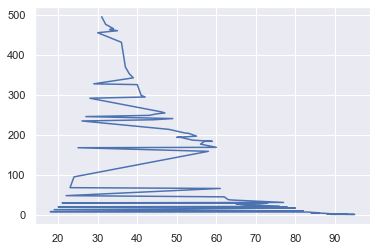

In [8]:
df["age"].value_counts().plot()

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

<AxesSubplot:>

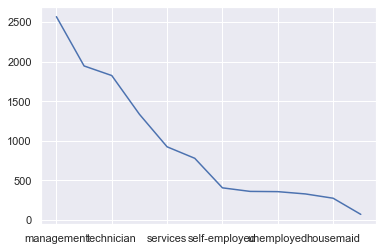

In [10]:
df["job"].value_counts().plot()

<AxesSubplot:>

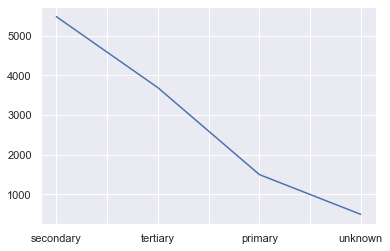

In [11]:
df["education"].value_counts().plot()

In [12]:
df["default"].value_counts(dropna=False)

no     10994
yes      168
Name: default, dtype: int64

In [13]:
df.describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .25, .5, .75, .9, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,11162.0,41.231948,11.913369,18.0,22.0,24.0,25.0,25.00,26.00,28.0,32.0,39.0,49.00,58.0,61.00,64.00,68.00,72.00,77.00,95.0
balance,11162.0,1566.676850,3210.328982,-6847.0,-522.0,-367.0,-244.0,-147.36,-54.95,26.0,215.0,550.0,1708.00,3897.6,6026.45,6987.48,8090.36,10086.00,13226.98,81204.0
day,11162.0,15.658036,8.420740,1.0,1.0,2.0,2.0,2.00,3.00,4.0,8.0,15.0,22.00,28.0,30.00,30.00,30.00,30.00,31.00,31.0
duration,11162.0,371.993818,347.128386,2.0,14.0,23.0,34.0,44.00,51.00,77.0,138.0,255.0,496.00,838.0,1079.90,1148.00,1236.17,1372.34,1577.17,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.0,2.0,3.00,5.0,7.00,8.00,8.00,10.00,13.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0,-1.0,20.75,191.0,326.00,343.00,355.00,369.00,425.39,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,1.00,3.0,5.00,5.00,6.00,7.00,10.00,58.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1c76c60dac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76c6290a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76c60d7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76c629640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76c629910>],
 'means': []}

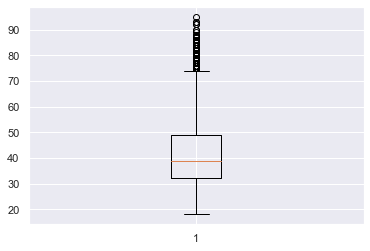

In [14]:
plt.boxplot(df["age"])

In [15]:
df["age"]=np.where(df["age"]>75, 75,df["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76c3b3430>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76c3b39d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76c3b3160>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76c3b3f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76c3e9280>],
 'means': []}

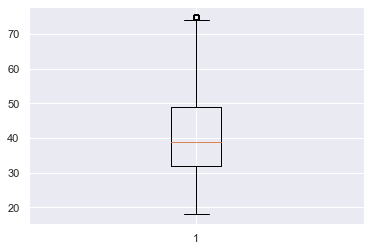

In [16]:
plt.boxplot(df["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76c504580>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76c504b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76c5042b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76c4fe100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76c4fe3d0>],
 'means': []}

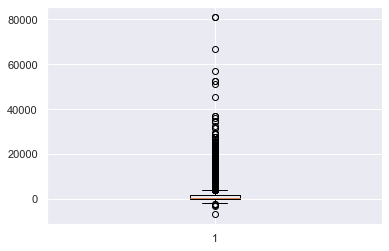

In [17]:
plt.boxplot(df["balance"])

In [18]:
df["balance"]=np.where(df["balance"]>40000, 40000,df["balance"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76ddc3250>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76ddc37f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76ddb4f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76ddc3d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76ddd30a0>],
 'means': []}

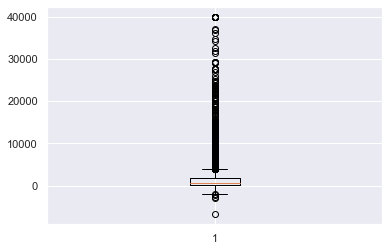

In [19]:
plt.boxplot(df["balance"])

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76de264c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76de26a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76de261f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76de32040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76de32310>],
 'means': []}

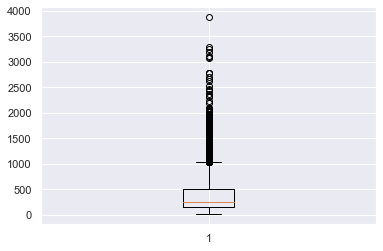

In [21]:
plt.boxplot(df["duration"])

In [22]:
df["duration"]=np.where(df["duration"]>3500, 3500,df["duration"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76de8e5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76de8eb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76de8e310>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76de9b190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76de9b460>],
 'means': []}

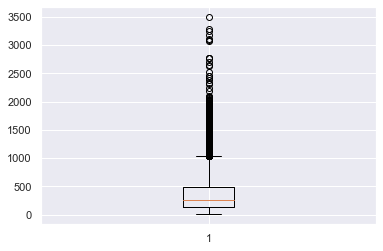

In [23]:
plt.boxplot(df["duration"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76def7460>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76def7a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76def7190>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76def7fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76df052b0>],
 'means': []}

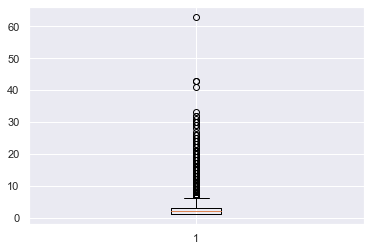

In [24]:
plt.boxplot(df["campaign"])

In [25]:
df["campaign"]=np.where(df["campaign"]>33, 33,df["campaign"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76df54cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76df642b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76df54a00>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76df64850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76df64b20>],
 'means': []}

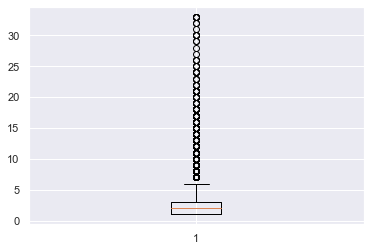

In [26]:
plt.boxplot(df["campaign"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76dfc34c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76dfc3a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76dfc3250>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76dfd1040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76dfd1310>],
 'means': []}

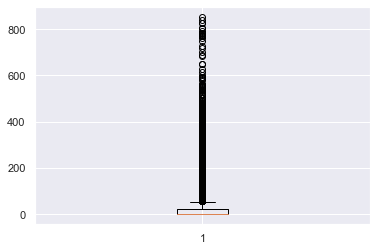

In [27]:
plt.boxplot(df["pdays"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76e023670>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76e023c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76e0233a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76e0301f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76e0304c0>],
 'means': []}

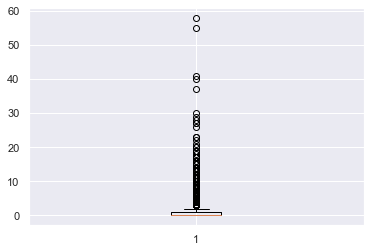

In [28]:
plt.boxplot(df["previous"])

In [29]:
df["previous"]=np.where(df["previous"]> 30, 30,df["previous"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c76e08c550>,
 'caps': [<matplotlib.lines.Line2D at 0x1c76e08caf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c76e08c280>],
 'medians': [<matplotlib.lines.Line2D at 0x1c76e0990d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c76e0993a0>],
 'means': []}

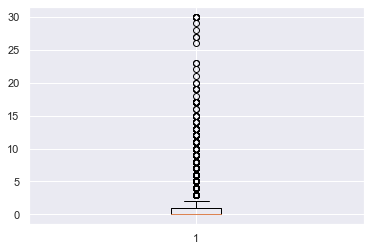

In [30]:
plt.boxplot(df["previous"])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df["default"]=LabelEncoder().fit_transform(df.deposit)

In [34]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,1,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,1,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,1,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,1,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,0,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,0,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,0,550,no,yes,cellular,8,may,9,2,172,5,failure,no


In [35]:
df1=pd.get_dummies(df, 
                     columns=["job","marital","education","deposit","housing","loan","contact","month","poutcome"],
              drop_first=True)

In [36]:
df1

,age,default,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,2343,5,1042,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,1,45,5,1467,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1,1270,5,1389,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,1,2476,5,579,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,1,184,5,673,2,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,20,257,1,-1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,0,733,16,83,4,-1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,0,29,19,156,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,550,8,9,2,172,5,0,0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
y=df1["default"]
X=df1.drop(columns=["default"])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=99)

In [40]:
log=LogisticRegression(random_state=99)

In [41]:
log.fit(X_train, y_train)

LogisticRegression(random_state=99)

In [42]:
print("Train Accuracy", log.score(X_train, y_train))

Train Accuracy 0.9882247536157686


In [43]:
print("Test Accuracy", log.score(X_test, y_test))

Test Accuracy 0.9868617497760526


In [44]:
pred_y_train=log.predict(X_train)  # It predict Classes

In [45]:
pred_y_test=log.predict(X_test) # It predict Classes

In [46]:
from sklearn import metrics

In [47]:
print(metrics.classification_report(y_train, pred_y_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4135
           1       0.99      0.99      0.99      3678

    accuracy                           0.99      7813
   macro avg       0.99      0.99      0.99      7813
weighted avg       0.99      0.99      0.99      7813



In [48]:
print(metrics.classification_report(y_test, pred_y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1738
           1       0.99      0.99      0.99      1611

    accuracy                           0.99      3349
   macro avg       0.99      0.99      0.99      3349
weighted avg       0.99      0.99      0.99      3349



In [49]:
probs_train=pd.DataFrame(log.predict_proba(X_train), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
probs_test=pd.DataFrame(log.predict_proba(X_test), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
new_pred_y_train=np.where(probs_train["Prob_1"]>=0.27,1,0)
# new_pred_y_train
new_pred_y_test=np.where(probs_test["Prob_1"]>=0.27,1,0)
# new_pred_y_test
print(metrics.classification_report(y_train, new_pred_y_train))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(metrics.classification_report(y_test, new_pred_y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4135
           1       0.97      1.00      0.98      3678

    accuracy                           0.99      7813
   macro avg       0.98      0.99      0.99      7813
weighted avg       0.99      0.99      0.99      7813

++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1738
           1       0.97      0.99      0.98      1611

    accuracy                           0.98      3349
   macro avg       0.98      0.99      0.98      3349
weighted avg       0.98      0.98      0.98      3349



In [50]:
probs_train=pd.DataFrame(log.predict_proba(X_train), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
probs_test=pd.DataFrame(log.predict_proba(X_test), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
new_pred_y_train=np.where(probs_train["Prob_1"]>=0.16,1,0)
# new_pred_y_train
new_pred_y_test=np.where(probs_test["Prob_1"]>=0.16,1,0)
# new_pred_y_test
print(metrics.classification_report(y_train, new_pred_y_train))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(metrics.classification_report(y_test, new_pred_y_test))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4135
           1       0.96      1.00      0.98      3678

    accuracy                           0.98      7813
   macro avg       0.98      0.98      0.98      7813
weighted avg       0.98      0.98      0.98      7813

++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1738
           1       0.96      1.00      0.98      1611

    accuracy                           0.98      3349
   macro avg       0.98      0.98      0.98      3349
weighted avg       0.98      0.98      0.98      3349

